# Comparing Lolo and Scikit-Learn
The purpose of this notebook is to compare the use and output of models in 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from lolopy.learners import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor as SKRFRegressor
from sklearn.datasets import load_boston
import numpy as np

## Create the Dataset
We'll use the famous Boston Housing Prices dataset

In [2]:
X, y = load_boston(True)
print('Training set size:', X.shape)

Training set size: (506, 13)


## Train a Scikit-Learn Random Forest
Just train the model on the entire Boston dataset and predict the housing price on every entry in the dataset

In [3]:
model = SKRFRegressor(n_estimators=len(X))

In [4]:
%%time 
model.fit(X, y)

CPU times: user 1.75 s, sys: 78.1 ms, total: 1.83 s
Wall time: 1.85 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=506, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [5]:
%%time
sk_pred = model.predict(X)

CPU times: user 78.1 ms, sys: 31.2 ms, total: 109 ms
Wall time: 72.7 ms


## Train Model Using Lolo
Train the model and get the predictions with uncertainties

In [6]:
model = RandomForestRegressor(num_trees=len(X))

In [7]:
%%time
model.fit(X, y)

CPU times: user 1.09 s, sys: 672 ms, total: 1.77 s
Wall time: 7.81 s


RandomForestRegressor(num_trees=506, subsetStrategy=4, useJackknife=True)

In [8]:
%%time
lolo_pred, lolo_std = model.predict(X, return_std=True)

CPU times: user 734 ms, sys: 609 ms, total: 1.34 s
Wall time: 5.32 s


Note that it follows the same API as the scikit-learn model

## Plot the Results
Just show that Lolo gives a reasonably similar model to sklearn

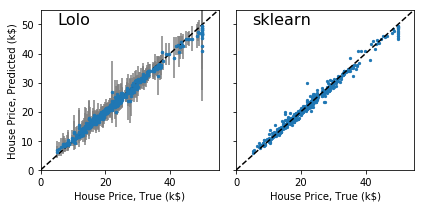

In [9]:
fig, axs = plt.subplots(1, 2, sharey=True)

axs[0].errorbar(y, lolo_pred, lolo_std, fmt='o', ms=2.5, ecolor='gray')
axs[1].scatter(y, sk_pred, s=5)

lim = [0, 55]

for ax, n in zip(axs, ['Lolo', 'sklearn']):
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_xlabel('House Price, True (k$)')
    ax.plot(lim, lim, 'k--')
    ax.text(5, 50, n, fontsize=16)
    
axs[0].set_ylabel('House Price, Predicted (k$)')
fig.set_size_inches(6, 3)
fig.tight_layout()

Lolo produces a Random Forest model very close to what scikit-learn does and can do error bars